In [3]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

In [4]:
def exp_reward(action, history):
    reward_for_action = history[action]
    return sum(reward_for_action) / len(reward_for_action)

In [5]:
def get_best_action(actions, history):
    exp_rewards = [exp_reward(action, history) for action in actions]
    return np.argmax(exp_rewards)

In [6]:
n = 10  # number of arms
probs = np.random.rand(n)  # array of hidden probabilities for each arm
eps = 0.2  # epsilon for epsilon-greedy action selection

In [7]:
def get_reward(prob, n=10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

In [8]:
np.mean([get_reward(0.7) for _ in range(2000)])

6.9675

In [9]:
record = np.zeros((n, 2))

In [11]:
# first col = no. of times each arm has been pulled
# second col = running average reward
record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [13]:
def update_record(record, action, r):
    new_r = (record[action, 0] * record[action, 1] + r) / (record[action, 0] + 1)
    record[action, 0] += 1
    record[action, 1] = new_r
    return record

In [14]:
def get_best_arm(record):
    arm_index = np.argmax(record[:, 1], axis=0)
    return arm_index

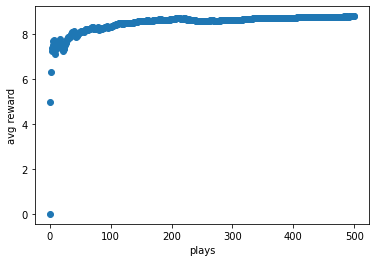

In [15]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("plays")
ax.set_ylabel("avg reward")

record = np.zeros((n,2))
probs = np.random.rand(n)
eps = 0.2
rewards = [0]

for i in range(500):
    if random.random() > eps:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)

ax.scatter(np.arange(len(rewards)), rewards)